In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tickers = ['^GSPC', 'BTC-USD', 'GC=F', 'CL=F']
df = yf.download(tickers, start='2023-01-01', end=None)
df = df['Close'].dropna()

df.rename(columns={'^GSPC':'S&P500'}, inplace=True)
df.rename(columns={'BTC-USD':'Bitcoin'}, inplace=True)
df.rename(columns={'GC=F':'Gold'}, inplace=True)
df.rename(columns={'CL=F':'Oil'}, inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_9400\2228422670.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2023-01-01', end=None)
[*********************100%***********************]  4 of 4 completed


In [3]:
returns = pd.DataFrame() 
returns['S&P500'] = df['S&P500'].pct_change().dropna()
returns['Bitcoin'] = df['Bitcoin'].pct_change().dropna()
returns['Gold'] = df['Gold'].pct_change().dropna()
returns['Oil'] = df['Oil'].pct_change().dropna()

In [4]:
volSP = returns['S&P500'].std() * np.sqrt(252)
volBTC = returns['Bitcoin'].std() * np.sqrt(252)
volGLD = returns['Gold'].std() * np.sqrt(252)
volOIL = returns['Oil'].std() * np.sqrt(252)
VOL = [['S&P500', volSP], ['Bitcoin', volBTC], ['Gold', volGLD], ['Oil', volOIL]]
print(VOL)

[['S&P500', np.float64(0.152558365755217)], ['Bitcoin', np.float64(0.48906409813767654)], ['Gold', np.float64(0.16416790193803524)], ['Oil', np.float64(0.31845150916685006)]]


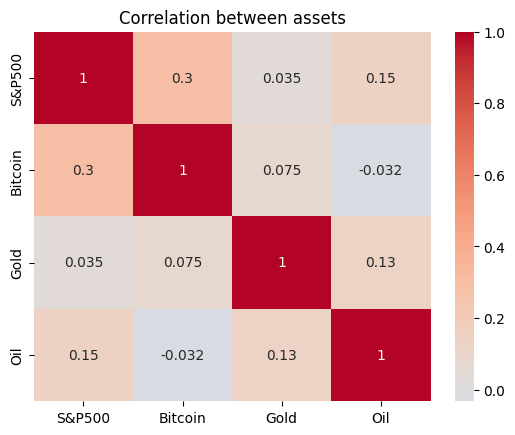

In [6]:
correlation_matrix = returns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between assets')
plt.show()